In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [ ]:
#  get small subset for experimenting
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz

In [2]:
input = '../Data/reviews_Cell_Phones_and_Accessories_5.json.gz'
data = []
with gzip.open(input) as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

194439
{'reviewerID': 'A30TL5EWN6DFXT', 'asin': '120401325X', 'reviewerName': 'christina', 'helpful': [0, 0], 'reviewText': "They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again", 'overall': 4.0, 'summary': 'Looks Good', 'unixReviewTime': 1400630400, 'reviewTime': '05 21, 2014'}


In [17]:
# getting a histogram: how many negative, neutral and positive

# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)

print(len(df))

1697533


In [18]:
df['text_length'] = df['reviewText'].apply(lambda review: len(review))
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,text_length
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4.0,good version of a classic,1203984000,"02 26, 2008",299
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3.0,Good but not as moving,1388361600,"12 30, 2013",122
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3.0,Winkler's Performance was ok at best!,1388361600,"12 30, 2013",251
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5.0,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008",153
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4.0,Best Scrooge yet,1387670400,"12 22, 2013",148


In [23]:
df['text_length'].value_counts(bins = 100)

(-32.766999999999996, 327.66]    673330
(327.66, 655.32]                 324405
(655.32, 982.98]                 191748
(982.98, 1310.64]                130852
(1310.64, 1638.3]                 91865
                                  ...  
(29489.4, 29817.06]                   1
(29817.06, 30144.72]                  1
(25229.82, 25557.48]                  1
(26212.8, 26540.46]                   1
(27851.1, 28178.76]                   0
Name: text_length, Length: 100, dtype: int64

Text(0.5, 1.0, 'Text lengths')

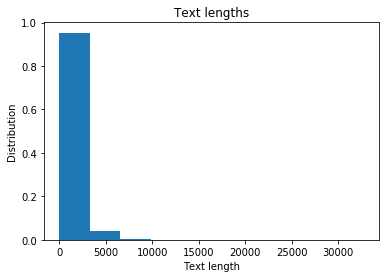

In [22]:
import matplotlib.pyplot as plt
plt.hist(df['text_length'], bins=10, weights=np.ones(len(df))/len(df))
plt.xlabel('Text length')
plt.ylabel('Distribution')
plt.title('Text lengths')

In [4]:
df.head()

,asin,image,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote
0,7508492919,NaN,5.0,Looks even better in person. Be careful to not...,"08 4, 2014",A24E3SXTC62LJI,Claudia Valdivia,{'Color:': ' Bling'},Can't stop won't stop looking at it,1407110400,True,NaN
1,7508492919,NaN,5.0,When you don't want to spend a whole lot of ca...,"02 12, 2014",A269FLZCB4GIPV,sarah ponce,NaN,1,1392163200,True,NaN
2,7508492919,NaN,3.0,"so the case came on time, i love the design. I...","02 8, 2014",AB6CHQWHZW4TV,Kai,NaN,Its okay,1391817600,True,NaN
3,7508492919,NaN,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,"02 4, 2014",A1M117A53LEI8,Sharon Williams,NaN,CASE,1391472000,True,NaN
4,7508492919,NaN,4.0,"I liked it because it was cute, but the studs ...","02 3, 2014",A272DUT8M88ZS8,Bella Rodriguez,NaN,Cute!,1391385600,True,NaN


In [33]:
print(df.shape)

(1697533, 9)


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697533 entries, 0 to 1697532
Data columns (total 9 columns):
asin              object
helpful           object
overall           float64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime    int64
dtypes: float64(1), int64(1), object(7)
memory usage: 116.6+ MB
None


In [12]:
df.describe(include='all')

,asin,image,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote
count,1128437,27107,1.128437e+06,1127672,1128437,1128437,1128302,605241,1127920,1.128437e+06,1128437,92034
unique,48186,26559,NaN,931224,4536,157212,122115,30106,527654,NaN,2,440
top,B00VH88CJ0,[https://images-na.ssl-images-amazon.com/image...,NaN,good,"02 18, 2015",A3HFQE02MDPC6I,Amazon Customer,{'Color:': ' Black'},Five Stars,NaN,True,2
freq,1684,7,NaN,6566,1399,331,38014,80252,228940,NaN,987324,33213
mean,NaN,NaN,4.221383e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.440400e+09,NaN,NaN
std,NaN,NaN,1.231917e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.569215e+07,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.035331e+09,NaN,NaN
25%,NaN,NaN,4.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.416355e+09,NaN,NaN
50%,NaN,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.444349e+09,NaN,NaN
75%,NaN,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.470442e+09,NaN,NaN


In [13]:
print(df['overall'].dtype)

float64


In [16]:
df['overall'].value_counts()

5.0    707038
4.0    184431
3.0     98254
1.0     81539
2.0     57175
Name: overall, dtype: int64

In [8]:
### remove rows with unformatted title (i.e. some 'title' may still contain html style content)

df3 = df.fillna('')
df4 = df3[df3.reviewText.str.contains('http')] # unformatted rows
df5 = df3[~df3.reviewText.str.contains('http')] # filter those unformatted rows
print(len(df4))
print(len(df5))

4803
1123634


In [9]:
df4.iloc[0]

asin                                                     9707716371
image                                                              
overall                                                           5
reviewText        This is a review of a few items I just bought....
reviewTime                                              05 31, 2016
reviewerID                                            AVOOU49YPVHGN
reviewerName                                              VVBulldog
style                                                              
summary                                      Great set of products.
unixReviewTime                                           1464652800
verified                                                       True
vote                                                             12
Name: 362, dtype: object

In [16]:
data = []
with gzip.open('../Data/reviews_Movies_and_TV_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

1697533
{'reviewerID': 'ADZPIG9QOCDG5', 'asin': '0005019281', 'reviewerName': 'Alice L. Larson "alice-loves-books"', 'helpful': [0, 0], 'reviewText': 'This is a charming version of the classic Dicken\'s tale.  Henry Winkler makes a good showing as the "Scrooge" character.  Even though you know what will happen this version has enough of a change to make it better that average.  If you love A Christmas Carol in any version, then you will love this.', 'overall': 4.0, 'summary': 'good version of a classic', 'unixReviewTime': 1203984000, 'reviewTime': '02 26, 2008'}


In [3]:
# getting a histogram: how many negative, neutral and positive

# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)

print(len(df))

1697533


In [4]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0005019281,"[0, 0]",4.0,This is a charming version of the classic Dick...,"02 26, 2008",ADZPIG9QOCDG5,"Alice L. Larson ""alice-loves-books""",good version of a classic,1203984000
1,0005019281,"[0, 0]",3.0,It was good but not as emotionally moving as t...,"12 30, 2013",A35947ZP82G7JH,Amarah Strack,Good but not as moving,1388361600
2,0005019281,"[0, 0]",3.0,"Don't get me wrong, Winkler is a wonderful cha...","12 30, 2013",A3UORV8A9D5L2E,Amazon Customer,Winkler's Performance was ok at best!,1388361600
3,0005019281,"[0, 0]",5.0,Henry Winkler is very good in this twist on th...,"02 13, 2008",A1VKW06X1O2X7V,"Amazon Customer ""Softmill""",It's an enjoyable twist on the classic story,1202860800
4,0005019281,"[0, 0]",4.0,This is one of the best Scrooge movies out. H...,"12 22, 2013",A3R27T4HADWFFJ,BABE,Best Scrooge yet,1387670400


In [5]:
print(df.shape)

(1697533, 9)


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697533 entries, 0 to 1697532
Data columns (total 9 columns):
asin              object
helpful           object
overall           float64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime    int64
dtypes: float64(1), int64(1), object(7)
memory usage: 116.6+ MB
None


In [7]:
df.describe(include='all')

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
count,1697533,1697533,1.697533e+06,1697533,1697533,1697533,1691457,1697533,1.697533e+06
unique,50052,9013,NaN,1696352,5799,123960,112400,1296940,NaN
top,B003EYVXV4,"[0, 0]",NaN,,"01 28, 2014",A3LZGLA88K0LA0,Amazon Customer,Great Movie,NaN
freq,2213,608781,NaN,62,2322,2368,11777,4640,NaN
mean,NaN,NaN,4.110648e+00,NaN,NaN,NaN,NaN,NaN,1.262422e+09
std,NaN,NaN,1.197615e+00,NaN,NaN,NaN,NaN,NaN,1.289277e+08
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,8.793792e+08
25%,NaN,NaN,4.000000e+00,NaN,NaN,NaN,NaN,NaN,1.164413e+09
50%,NaN,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,1.307491e+09
75%,NaN,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,1.373242e+09


In [9]:
df['overall'].value_counts()

5.0    906608
4.0    382994
3.0    201302
1.0    104219
2.0    102410
Name: overall, dtype: int64

In [15]:
df['unixReviewTime'].count()

1697533